# Question 3

## Fighters and Fighting Styles Analysis


Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib.patches as patches


### Loading Data


In [2]:
fighter_stats = pd.read_csv("datasets/fighter_stats.csv")
fighters = pd.read_csv("datasets/pro_mma_fighters.csv")
fights_df = pd.read_csv("datasets/merged_stats_n_scorecards.csv", sep=";")


Cleaning datasets and removing unnecessary columns


In [3]:
fighter_stats = fighter_stats.dropna(subset=["name"])
fighters = fighters.dropna(subset=["fighter_name"])


In [4]:
duplicate_stats = fighter_stats["name"][fighter_stats["name"].duplicated()]
duplicate_rows_stats = fighter_stats[fighter_stats["name"].isin(duplicate_stats)]

duplicate_fighters = fighters["fighter_name"][fighters["fighter_name"].duplicated()]
duplicate_rows_fighters = fighters[fighters["fighter_name"].isin(duplicate_fighters)]

fighter_stats = fighter_stats[~fighter_stats["name"].isin(duplicate_stats)]
fighters = fighters[~fighters["fighter_name"].isin(duplicate_fighters)]


In [5]:
cols_stats = [
    "nickname",
    "height_cm",
    "weight_in_kg",
    "reach_in_cm",
    "stance",
    "date_of_birth",
    "wins",
]
cols_fighters = [
    "url",
    "nickname",
    "birth_date",
    "age",
    "death_date",
    "height",
    "weight",
    "lossess",
]
fighter_stats.drop(columns=cols_stats, inplace=True)
fighters.drop(columns=cols_fighters, inplace=True)


Merging data


In [6]:
merged_data = pd.merge(
    fighter_stats, fighters, left_on="name", right_on="fighter_name", how="inner"
)
merged_data[["wins", "wins_other", "losses", "losses_other", "draws"]] = merged_data[
    ["wins", "wins_other", "losses", "losses_other", "draws"]
].fillna(0)

merged_data.head()


,name,losses,draws,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,...,weight_class,wins,wins_ko,wins_submission,wins_decision,wins_other,losses_ko,losses_submission,losses_decision,losses_other
0,Robert Drysdale,0,0,0.00,0.0,0.00,0.0,7.32,100.0,0.0,...,Light Heavyweight,7,0,7,0,0.0,0,0,0,0.0
1,Paul Ruiz,4,0,1.40,33.0,1.40,75.0,0.00,0.0,100.0,...,Bantamweight,7,3,1,3,0.0,0,0,3,0.0
2,Gerald Strebendt,7,0,0.00,0.0,4.00,38.0,0.00,0.0,0.0,...,Lightweight,9,1,8,0,0.0,4,3,0,0.0
3,Neil Grove,8,1,0.00,0.0,0.00,0.0,0.00,0.0,100.0,...,Heavyweight,12,12,0,0,0.0,1,3,4,0.0
4,Raphael Butler,2,1,4.69,45.0,0.94,91.0,0.00,0.0,100.0,...,Heavyweight,9,6,3,0,0.0,1,1,0,0.0


Two data frames containing information about fighters were merged based on the fighter names and all NaN values are replaced by zeroes in all columns where they semantically represent 0.


### Most Successful Fighters Overall


#### Top 20 Fighters with most overall wins


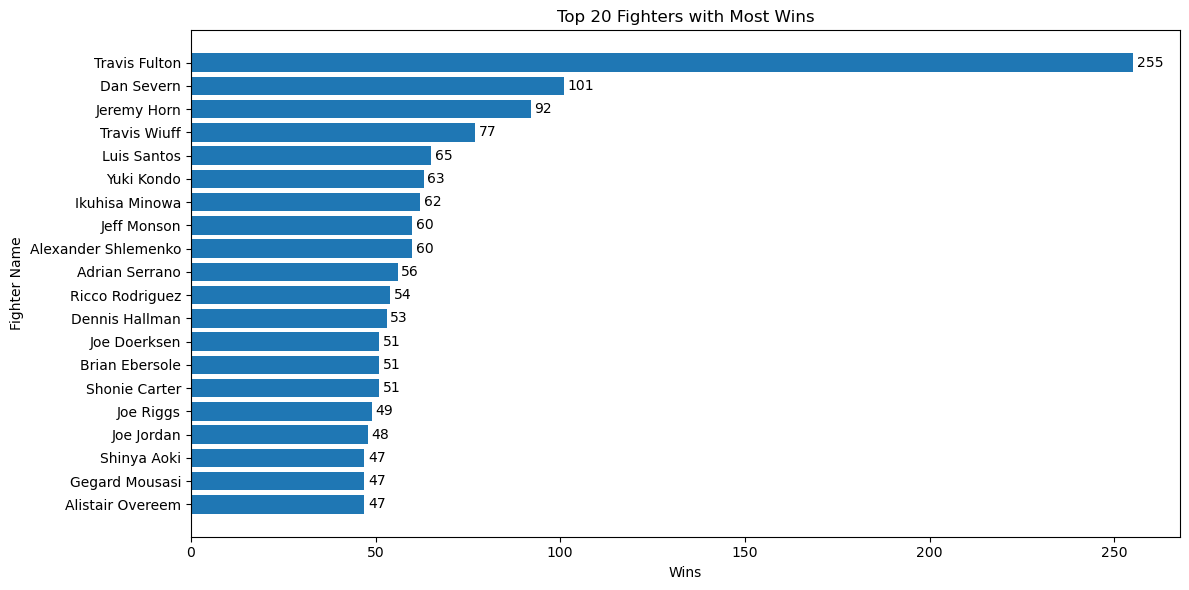

In [7]:
top_20_fighters = merged_data.nlargest(20, "wins")[["name", "wins"]]
top_fighters = set(top_20_fighters["name"])

plt.figure(figsize=(12, 6))
plt.barh(top_20_fighters["name"], top_20_fighters["wins"], align="center")
plt.xlabel("Wins")
plt.ylabel("Fighter Name")
plt.title("Top 20 Fighters with Most Wins")
plt.gca().invert_yaxis()

for index, value in enumerate(top_20_fighters["wins"]):
    plt.text(value + 1, index, str(value), va="center")

plt.tight_layout()

plt.show()


Travis Fulton stands out as the fighter with by far the most wins, but Dan Severn, Jeremy Horn and Travis Wiuff (althouh by smaller margin) are also ahead of the curve.


#### Top 20 Fighters with most wins, but without a loss


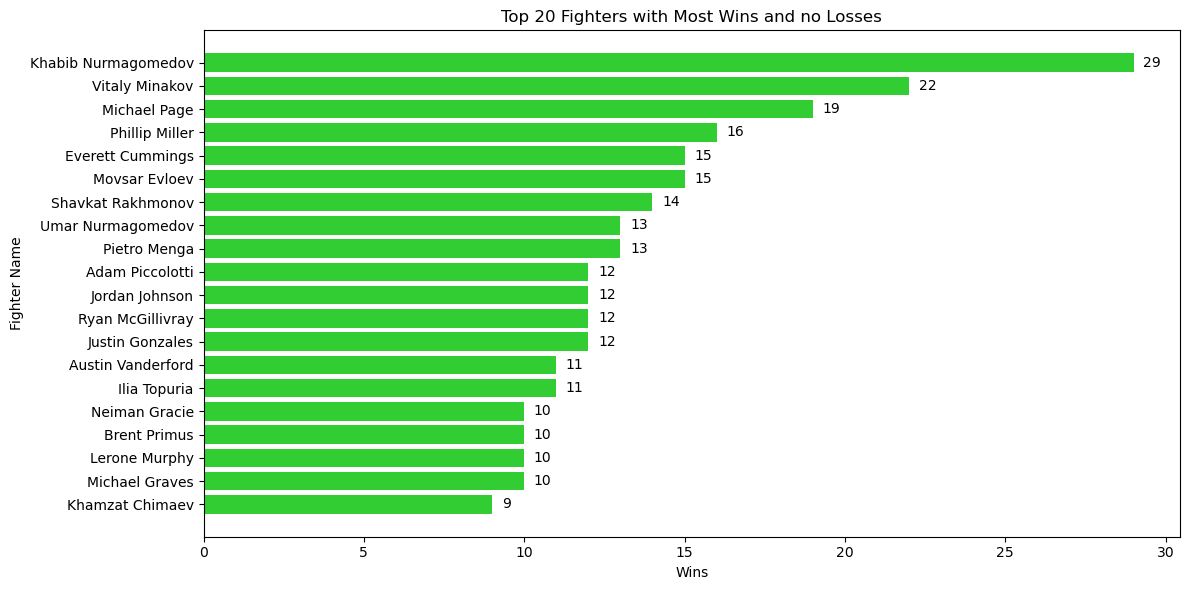

In [8]:
zero_losses = merged_data[merged_data["losses"] == 0]
top_20_unbeaten = zero_losses.nlargest(20, "wins")[["name", "wins"]]
top_fighters.update(top_20_unbeaten["name"])


plt.figure(figsize=(12, 6))
plt.barh(
    top_20_unbeaten["name"], top_20_unbeaten["wins"], align="center", color="limegreen"
)
plt.xlabel("Wins")
plt.ylabel("Fighter Name")
plt.title("Top 20 Fighters with Most Wins and no Losses")
plt.gca().invert_yaxis()

for index, value in enumerate(top_20_unbeaten["wins"]):
    plt.text(value + 0.3, index, str(value), va="center")

plt.tight_layout()

plt.show()


Khabib Nurmagomedov's unbeaten record is the most impressive one.


#### Top 20 Fighters considering win percentage, $\frac{wins}{wins + draws + losses}$


In [9]:
merged_data["no_of_fights"] = merged_data[["wins", "losses", "draws"]].sum(
    axis=1, skipna=True
)
merged_data["win_percentage"] = merged_data["wins"] / merged_data["no_of_fights"]
tenth_perc_no_of_fights = round(merged_data["no_of_fights"].quantile(0.1))
print("10th percintile of number of fights: ", (tenth_perc_no_of_fights))


10th percintile of number of fights:  8


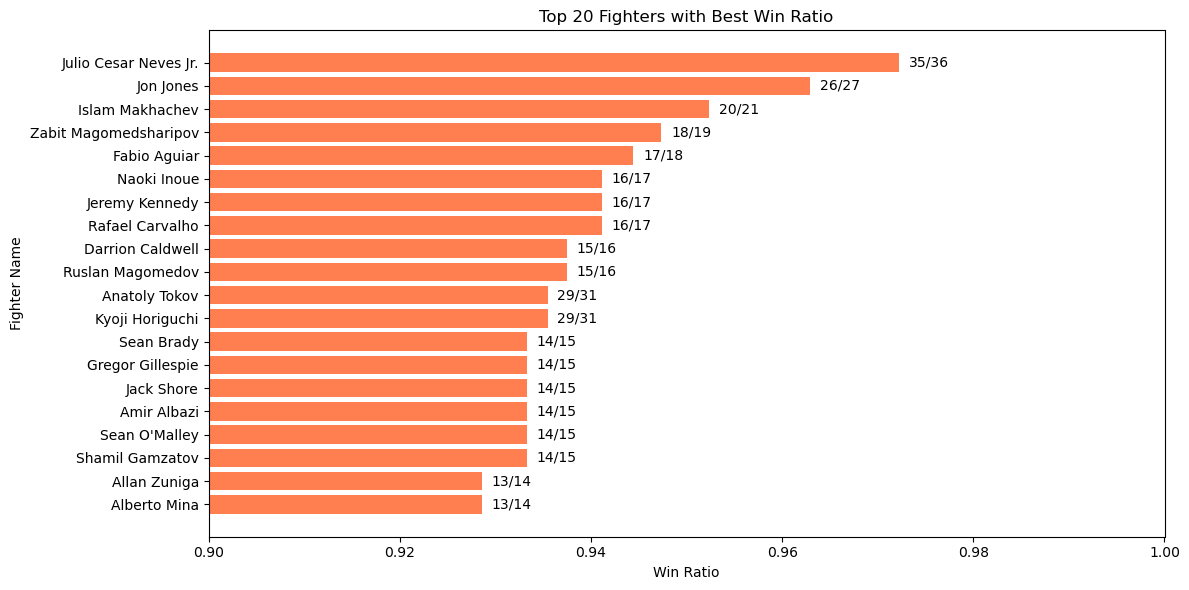

In [10]:
over_tenth_perc_fights = merged_data[
    merged_data["no_of_fights"] > tenth_perc_no_of_fights
].copy()
over_tenth_perc_fights = over_tenth_perc_fights[
    over_tenth_perc_fights["win_percentage"] != 1
]
over_tenth_perc_fights = over_tenth_perc_fights.sort_values(
    by=["win_percentage", "no_of_fights"], ascending=[False, False]
)

top_20_percentage = over_tenth_perc_fights.head(20)[
    ["name", "wins", "no_of_fights", "win_percentage"]
]
top_fighters.update(top_20_percentage["name"])

plt.figure(figsize=(12, 6))
plt.barh(
    top_20_percentage["name"],
    top_20_percentage["win_percentage"],
    align="center",
    color="coral",
)
plt.xlabel("Win Ratio")
plt.ylabel("Fighter Name")
plt.title("Top 20 Fighters with Best Win Ratio")
plt.gca().invert_yaxis()
plt.xlim(0.9, 1)

for i, row in enumerate(top_20_percentage.itertuples()):
    annotation = f"{row.wins}/{row.no_of_fights}"
    plt.text(row.win_percentage + 0.001, i, annotation, va="center")

plt.tight_layout()

plt.show()


The win percentage is not calculated on 10% least experienced fighters in dataset, because the small number of fights can lead to wrong conclusions. Also, the fighters with 0 losses are also excluded because they all have 100% win rate and are already processed in the previous visualization.

All fighters that proved to be top 20 and appeared in these three visualizations were saved in set of best fighters.


### Most Successful Fighters Based on Winning Style

<!-- Only fighters with more than median number of wins are considered -->

#### Distribution of winning types

All wins


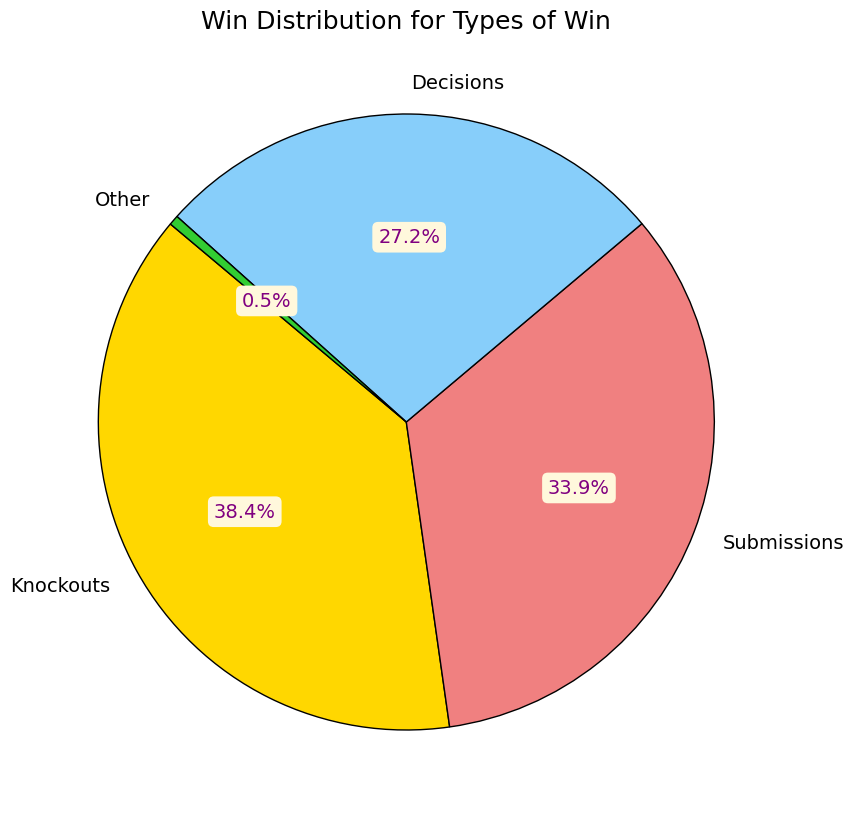

In [11]:
win_type_data = merged_data[merged_data["wins"] >= 1]

knockouts = win_type_data["wins_ko"].sum()
submission = win_type_data["wins_submission"].sum()
decision = win_type_data["wins_decision"].sum()
other = win_type_data["wins_other"].sum()
total_wins = win_type_data["wins"].sum()


other += total_wins - (knockouts + submission + decision + other)

labels = ["Knockouts", "Submissions", "Decisions", "Other"]
sizes = [knockouts, submission, decision, other]
colors = ["gold", "lightcoral", "lightskyblue", "limegreen"]
label_fontsize = 14
title_fontsize = 18
autopct_color = "purple"
background_color = "cornsilk"

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": label_fontsize},
)

for autotext in autotexts:
    bbox_props = {
        "boxstyle": "round,pad=0.3",
        "facecolor": background_color,
        "edgecolor": "none",
    }
    autotext.set_bbox(bbox_props)
    autotext.set_color(autopct_color)
    autotext.set_fontsize(label_fontsize)

plt.title("Win Distribution for Types of Win", fontsize=title_fontsize)

plt.show()


This chart illustrates that knockouts are the most common method of victory, with submissions and decisions also playing significant roles. Together, these three outcomes form an almost even distribution, collectively accounting for nearly all fight results.


Fighters with dominant style


In [12]:
win_type_data = win_type_data.copy()
win_type_data["ko_perc"] = (win_type_data["wins_ko"]) / (win_type_data["wins"])
win_type_data["submission_perc"] = (
    (win_type_data["wins_submission"]) / (win_type_data["wins"])
)
win_type_data["decision_perc"] = (
    (win_type_data["wins_decision"]) / (win_type_data["wins"])
)

melted_data = win_type_data.melt(
    id_vars=["name", "wins"],
    value_vars=["ko_perc", "submission_perc", "decision_perc"],
    var_name="Type",
    value_name="Percentage",
)

dominant_type = melted_data[melted_data["Percentage"] > 0.5]

print(
    "Proportion of fighters that do have dominant way of winning: {:.2f}%".format(
        len(dominant_type) / len(win_type_data) * 100
    )
)


Proportion of fighters that do have dominant way of winning: 58.89%


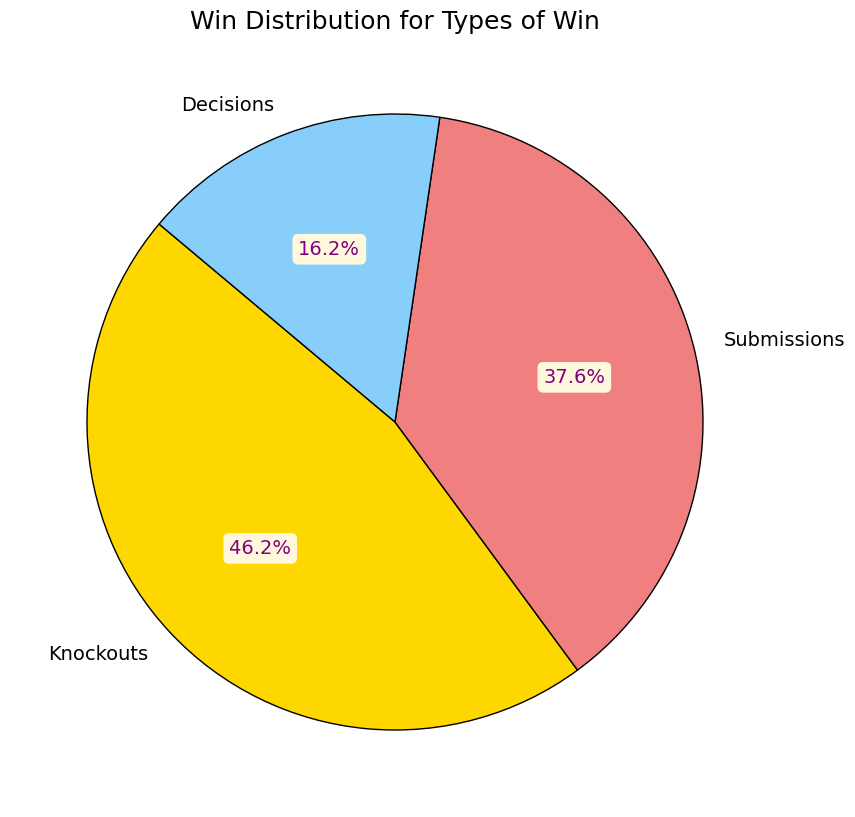

In [13]:
ko_df = dominant_type[dominant_type["Type"] == "ko_perc"]
ko_submission = dominant_type[dominant_type["Type"] == "submission_perc"]
ko_decision = dominant_type[dominant_type["Type"] == "decision_perc"]

labels = ["Knockouts", "Submissions", "Decisions"]
sizes = [len(ko_df), len(ko_submission), len(ko_decision)]
colors = ["gold", "lightcoral", "lightskyblue"]
label_fontsize = 14
title_fontsize = 18
autopct_color = "purple"
background_color = "cornsilk"

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": label_fontsize},
)

for autotext in autotexts:
    bbox_props = {
        "boxstyle": "round,pad=0.3",
        "facecolor": background_color,
        "edgecolor": "none",
    }
    autotext.set_bbox(bbox_props)
    autotext.set_color(autopct_color)
    autotext.set_fontsize(label_fontsize)

plt.title("Win Distribution for Types of Win", fontsize=title_fontsize)

plt.show()


Firstly, columns containing percentage of fights won by type of outcome were added. To say one predominantly wins by certain outcome, more than 50% percent of his victories must be by that outcome, so only rows with `Percentage` > 50% were left in the data frame. As shown, around 60% of fighters do have an outcome they predominantly win with. In the consequent Pie-Chart it can be seen, as expected that no fighter


#### Fighters With Dominant Style Among Best Fighters


In [14]:
print("Number of best fighters: ", len(top_fighters))
best_dominant_fighters = (
    dominant_type[dominant_type["name"].isin(top_fighters)]
    .sort_values(by="Percentage", ascending=False)
    .reset_index()
)
print("Number of best fighters with dominant style: ", len(best_dominant_fighters))
print(
    "Ratio of fighters with dominant style among best fighters: {:.1f}%".format(
        len(best_dominant_fighters) / len(top_fighters) * 100
    )
)


Number of best fighters:  60
Number of best fighters with dominant style:  39
Ratio of fighters with dominant style among best fighters: 65.0%


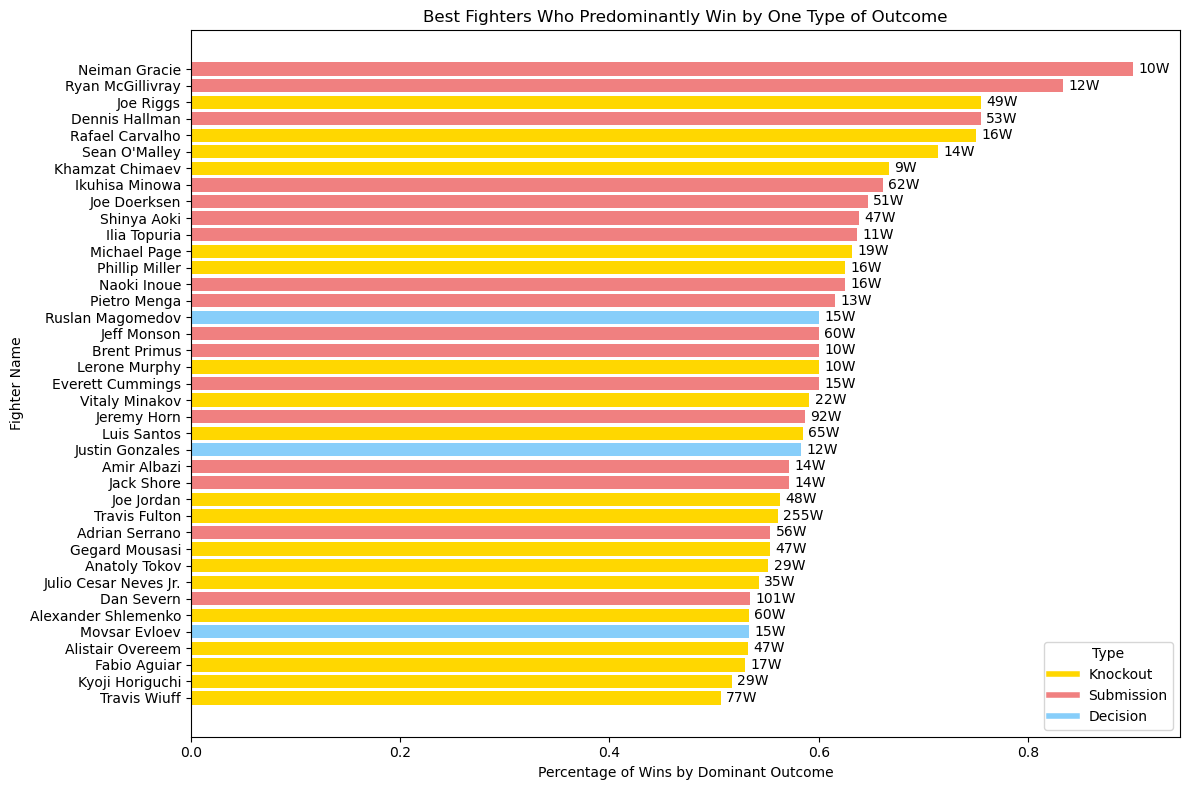

In [15]:
color_map = {
    "ko_perc": "gold",
    "submission_perc": "lightcoral",
    "decision_perc": "lightskyblue",
}
win_type_map = {
    "ko_perc": "Knockout",
    "submission_perc": "Submission",
    "decision_perc": "Decision",
}

best_dominant_fighters["Color"] = best_dominant_fighters["Type"].map(color_map)

plt.figure(figsize=(12, 8))
bars = plt.barh(
    best_dominant_fighters["name"],
    best_dominant_fighters["Percentage"],
    color=best_dominant_fighters["Color"],
    align="center",
)

plt.xlabel("Percentage of Wins by Dominant Outcome")
plt.ylabel("Fighter Name")
plt.title("Best Fighters Who Predominantly Win by One Type of Outcome")
plt.gca().invert_yaxis()

legend_labels = [
    plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()
]
legend_names = [win_type_map[key] for key in color_map.keys()]
plt.legend(legend_labels, legend_names, title="Type", loc="lower right")

for i, row in enumerate(best_dominant_fighters.itertuples()):
    plt.text(row.Percentage + 0.005, i, f"{row.wins}W", va="center")


plt.tight_layout()
plt.show()


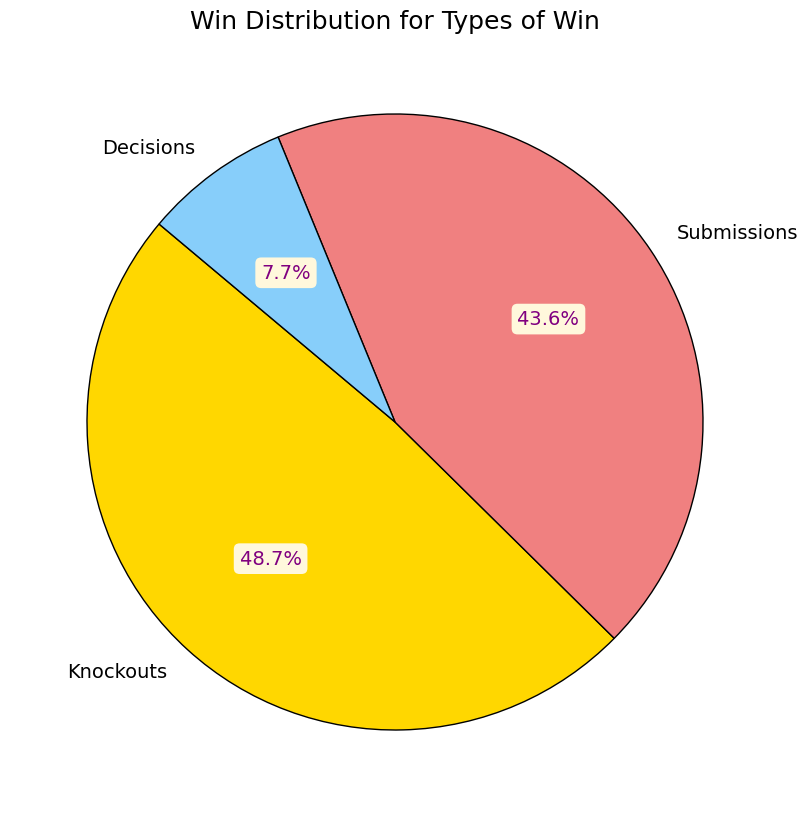

In [16]:
labels = ["Knockouts", "Submissions", "Decisions"]
sizes = [
    len(best_dominant_fighters[best_dominant_fighters["Type"] == "ko_perc"]),
    len(best_dominant_fighters[best_dominant_fighters["Type"] == "submission_perc"]),
    len(best_dominant_fighters[best_dominant_fighters["Type"] == "decision_perc"]),
]
colors = ["gold", "lightcoral", "lightskyblue"]
label_fontsize = 14
title_fontsize = 18
autopct_color = "purple"
background_color = "cornsilk"

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": label_fontsize},
)

for autotext in autotexts:
    bbox_props = {
        "boxstyle": "round,pad=0.3",
        "facecolor": background_color,
        "edgecolor": "none",
    }
    autotext.set_bbox(bbox_props)
    autotext.set_color(autopct_color)
    autotext.set_fontsize(label_fontsize)

plt.title("Win Distribution for Types of Win", fontsize=title_fontsize)

plt.show()


In [17]:
average_percentage_per_type = best_dominant_fighters.groupby("Type")[
    "Percentage"
].mean()
print(
    "Average win percentage for Knockout fighters: {:.2f}%".format(
        average_percentage_per_type["ko_perc"] * 100
    )
)
print(
    "Average win percentage for Submission fighters: {:.2f}%".format(
        average_percentage_per_type["submission_perc"] * 100
    )
)
print(
    "Average win percentage for Decision fighters: {:.2f}%".format(
        average_percentage_per_type["decision_perc"] * 100
    )
)


Average win percentage for Knockout fighters: 59.51%
Average win percentage for Submission fighters: 64.29%
Average win percentage for Decision fighters: 57.22%


Here are the best fighters that have won with one style more than half of their fights. Number of wins is displayed to the right of the bars in barplot. From obtained 60 best fighters in previous parts of code, 39 of them match th "Fighters With Dominant Style" role. Interestingly, here fighters who win by submission the most came even closer to knockout fighters representation-wise. In addition, most submission fighters are in the top part of the graph. Numerical confirmation is the average win percentage, which submission fighters have the largest. Furthermore, the share of decision fighters kept falling and among these 39 fighters there are only three decision fighters and they have the lowest average win percentage. That can be explained by the fact that man can not depend on referee's decision in most of the fights and be very successful.


### Location


Mapping all countries to corresponding continent


In [18]:
Europe = [
    "Austria",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Czech Republic",
    "Denmark",
    "England",
    "Finland",
    "France",
    "Georgia",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Macedonia",
    "Moldova",
    "Netherlands",
    "Northern Ireland",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Russia",
    "Scotland",
    "Serbia",
    "Slovakia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Turkey",
    "Ukraine",
    "Wales",
]

Asia = [
    "Afghanistan",
    "Armenia",
    "China",
    "India",
    "Iran",
    "Iraq",
    "Israel",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kyrgyzstan",
    "Mongolia",
    "Philippines",
    "Singapore",
    "South Korea",
    "Syria",
    "Taiwan",
    "Tajikistan",
    "Thailand",
    "Turkey",
    "Uzbekistan",
]

Africa = [
    "Angola",
    "Cameroon",
    "Cape Verde",
    "Morocco",
    "Nigeria",
    "South Africa",
    "Tunisia",
]

North_America = [
    "Canada",
    "Costa Rica",
    "Cuba",
    "El Salvador",
    "Guam",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Northern Mariana Islands",
    "Panama",
    "Puerto Rico",
    "United States",
    "USA",
]

South_America = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela",
]

Oceania = ["Australia", "New Zealand"]

continent_map = {}
for country in Europe:
    continent_map[country] = "Europe"
for country in Asia:
    continent_map[country] = "Asia"
for country in Africa:
    continent_map[country] = "Africa"
for country in North_America:
    continent_map[country] = "North America"
for country in South_America:
    continent_map[country] = "South America"
for country in Oceania:
    continent_map[country] = "Oceania"


In [19]:
merged_data = merged_data.dropna(subset=["country"])
merged_data["continent"] = merged_data["country"].map(continent_map)


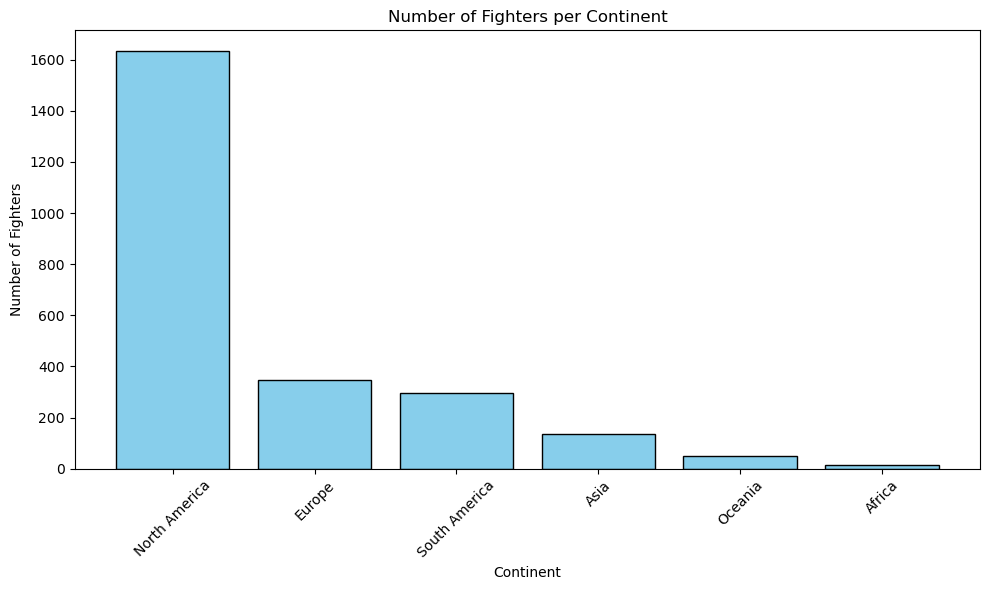

In [20]:
continent_counts = merged_data["continent"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(
    continent_counts.index, continent_counts.values, color="skyblue", edgecolor="black"
)

plt.xlabel("Continent")
plt.ylabel("Number of Fighters")
plt.title("Number of Fighters per Continent")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The vast majority of fighters are from North America.


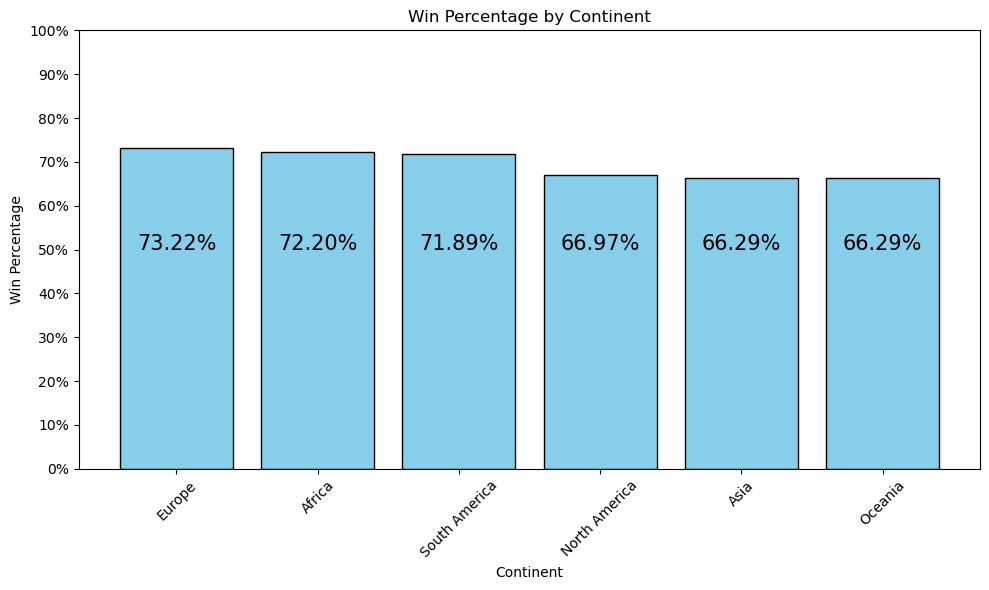

In [21]:
selected_columns = [
    "continent",
    "losses",
    "draws",
    "wins_ko",
    "wins_submission",
    "wins_decision",
]
averaged_fighters = merged_data[selected_columns].groupby("continent").mean()

averaged_fighters["wins"] = (
    averaged_fighters["wins_ko"]
    + averaged_fighters["wins_submission"]
    + averaged_fighters["wins_decision"]
)
averaged_fighters["no_of_fights"] = (
    averaged_fighters["losses"] + averaged_fighters["draws"] + averaged_fighters["wins"]
)
averaged_fighters["win_percentage"] = (
    averaged_fighters["wins"] / averaged_fighters["no_of_fights"]
)

averaged_fighters = averaged_fighters.reset_index()
averaged_fighters = averaged_fighters.sort_values(by="win_percentage", ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(
    averaged_fighters["continent"],
    averaged_fighters["win_percentage"],
    color="skyblue",
    edgecolor="black",
)

plt.xlabel("Continent")
plt.ylabel("Win Percentage")
plt.title("Win Percentage by Continent")


for idx, percentage in enumerate(averaged_fighters["win_percentage"]):
    plt.text(
        idx, 0.5, f"{percentage * 100:.2f}%", ha="center", color="black", fontsize=15
    )

plt.gca().set_yticks([i / 10 for i in range(0, 11)])
plt.gca().set_yticklabels([f"{int(i * 100)}%" for i in plt.gca().get_yticks()])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Even though the differences are not grand, there seem to be two clusters, one with Europe, Africa and South America with win percentages around 72,5% and other one with North America, Asia and Oceania with percentages around 66.5%.


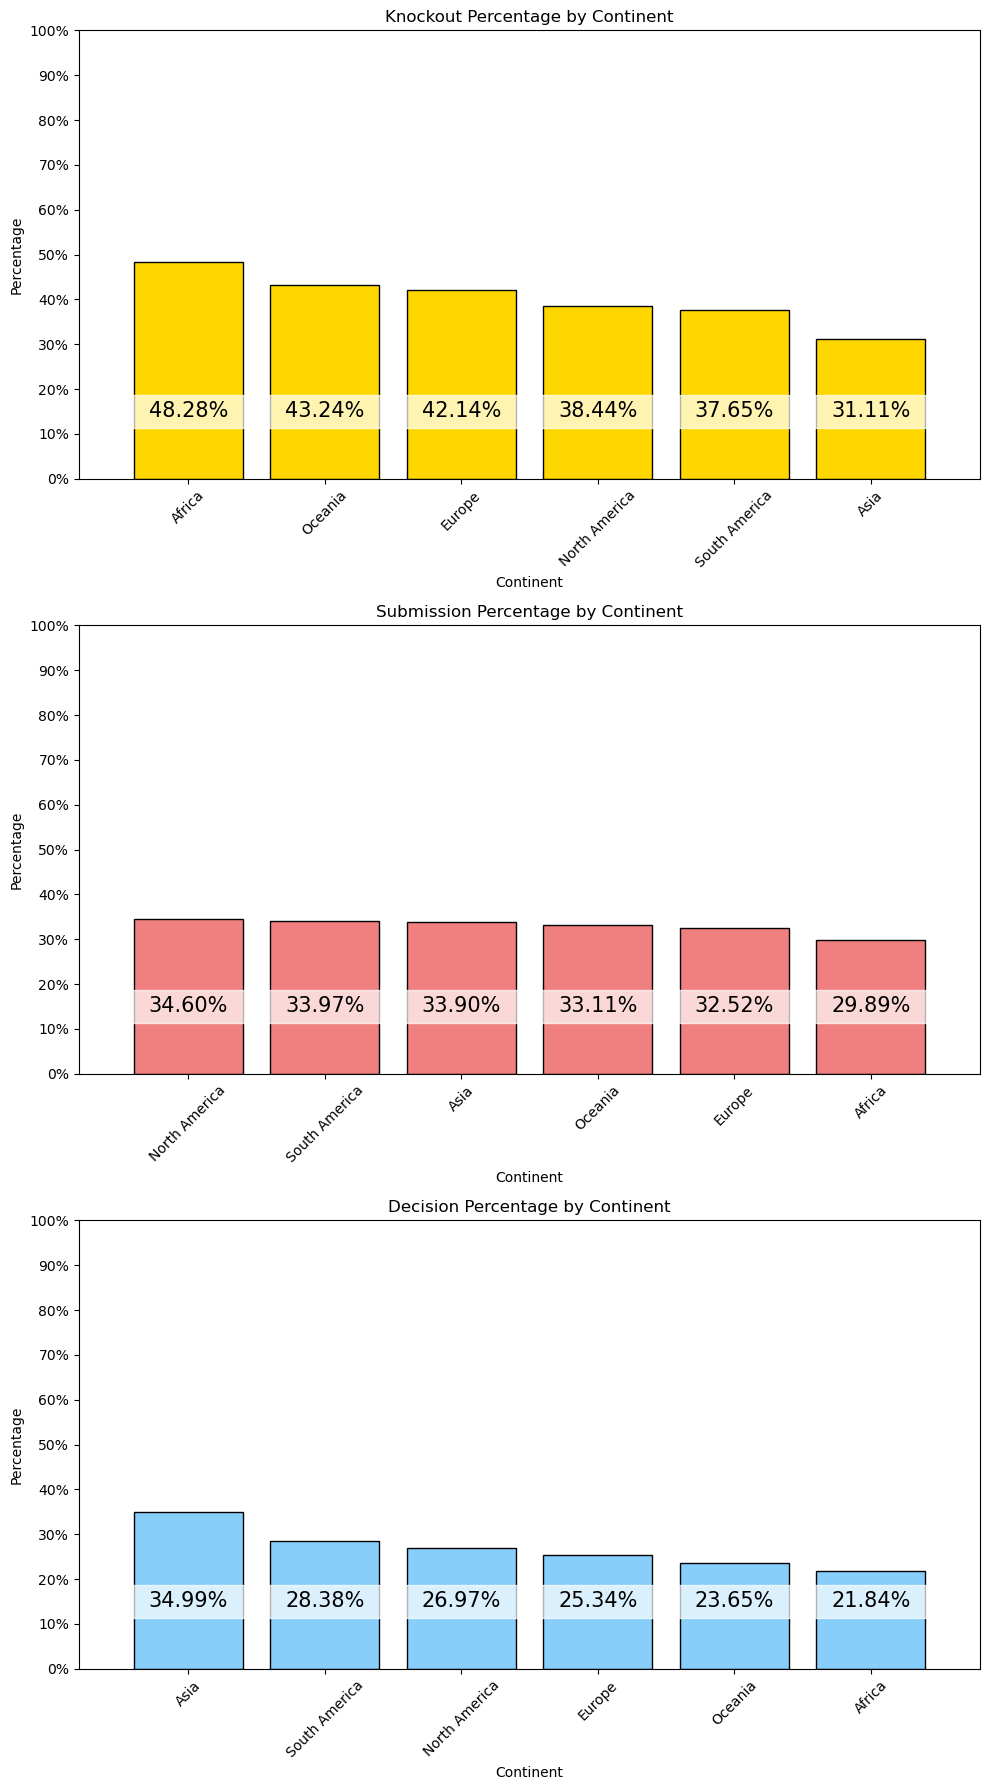

In [22]:
averaged_fighters["ko_perc"] = (
    (averaged_fighters["wins_ko"]) / (averaged_fighters["wins"])
)
averaged_fighters["submission_perc"] = (
    (averaged_fighters["wins_submission"]) / (averaged_fighters["wins"])
)
averaged_fighters["decision_perc"] = (
    (averaged_fighters["wins_decision"]) / (averaged_fighters["wins"])
)

fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=False)

titles = [
    "Knockout Percentage by Continent",
    "Submission Percentage by Continent",
    "Decision Percentage by Continent",
]
columns = ["ko_perc", "submission_perc", "decision_perc"]
colors = ["gold", "lightcoral", "lightskyblue"]

for i, (ax, col, color, title) in enumerate(zip(axes, columns, colors, titles)):
    sorted_data = averaged_fighters.sort_values(by=col, ascending=False)
    bars = ax.bar(
        sorted_data["continent"], sorted_data[col], color=color, edgecolor="black"
    )

    for bar, percentage in zip(bars, sorted_data[col]):
        x = bar.get_x() + bar.get_width() / 2
        y = 0.15
        rect = patches.Rectangle(
            (x - 0.5, y - 0.0375),
            1,
            0.075,
            color="white",
            alpha=0.7,
            transform=ax.transData,
            zorder=2,
        )
        ax.add_patch(rect)
        ax.text(
            x,
            y,
            f"{percentage * 100:.2f}%",
            ha="center",
            va="center",
            fontsize=15,
            color="black",
            zorder=3,
        )

    ax.set_ylabel("Percentage")
    ax.set_title(title)
    ax.set_ylim(0, 1)
    ax.set_yticks([i / 10 for i in range(0, 11)])
    ax.set_yticklabels([f"{int(i * 100)}%" for i in ax.get_yticks()])
    ax.set_xticks(range(len(sorted_data["continent"])))
    ax.set_xticklabels(sorted_data["continent"], rotation=45)
    ax.set_xlabel("Continent")

plt.tight_layout()
plt.show()


Based on average data for each continent, Africa and Asia have most homogenous fighting style. African fighters favor knockout considerably more than any other continent while also having te lowest percentage in submission and decision wins. Asia, on the other hand, has noticeably lower knockout percentage and noticeably higher percentage in referee decision wins.

Submission win rates are almost the same for all continents, apart from Africa that has a bit smaller percentage than the rest.

Another observation is that Europe and Oceania have very similar results, as do North and South America, pointing to similar fighting styles these continents mutually share


In [23]:
new_columns = ["name", "sig_str", "sig_str_head", "sig_str_body", "sig_str_leg"]
body_parts = ["sig_str", "sig_str_head", "sig_str_body", "sig_str_leg"]

red_columns = [f"red_fighter_{col}" for col in new_columns]
blue_columns = [f"blue_fighter_{col}" for col in new_columns]
columns_to_keep = red_columns + blue_columns


fights_df = fights_df[columns_to_keep]


for part in body_parts:
    fights_df[[f"red_fighter_{part}_succ", f"red_fighter_{part}_att"]] = fights_df[
        f"red_fighter_{part}"
    ].str.split(" of ", expand=True)
    fights_df[[f"blue_fighter_{part}_succ", f"blue_fighter_{part}_att"]] = fights_df[
        f"blue_fighter_{part}"
    ].str.split(" of ", expand=True)

    fights_df[f"red_fighter_{part}_succ"] = pd.to_numeric(
        fights_df[f"red_fighter_{part}_succ"], errors="coerce"
    )
    fights_df[f"red_fighter_{part}_att"] = pd.to_numeric(
        fights_df[f"red_fighter_{part}_att"], errors="coerce"
    )
    fights_df[f"blue_fighter_{part}_succ"] = pd.to_numeric(
        fights_df[f"blue_fighter_{part}_succ"], errors="coerce"
    )
    fights_df[f"blue_fighter_{part}_att"] = pd.to_numeric(
        fights_df[f"blue_fighter_{part}_att"], errors="coerce"
    )


fights_df_split = fights_df.drop(
    columns=[
        "red_fighter_sig_str",
        "blue_fighter_sig_str",
        "red_fighter_sig_str_head",
        "blue_fighter_sig_str_head",
        "red_fighter_sig_str_body",
        "blue_fighter_sig_str_body",
        "red_fighter_sig_str_leg",
        "blue_fighter_sig_str_leg",
    ]
)

red_fighters_df = fights_df_split[
    [
        "red_fighter_name",
        "red_fighter_sig_str_succ",
        "red_fighter_sig_str_att",
        "red_fighter_sig_str_head_succ",
        "red_fighter_sig_str_head_att",
        "red_fighter_sig_str_body_succ",
        "red_fighter_sig_str_body_att",
        "red_fighter_sig_str_leg_succ",
        "red_fighter_sig_str_leg_att",
    ]
].rename(columns=lambda x: x.replace("red_fighter_", ""))

blue_fighters_df = fights_df_split[
    [
        "blue_fighter_name",
        "blue_fighter_sig_str_succ",
        "blue_fighter_sig_str_att",
        "blue_fighter_sig_str_head_succ",
        "blue_fighter_sig_str_head_att",
        "blue_fighter_sig_str_body_succ",
        "blue_fighter_sig_str_body_att",
        "blue_fighter_sig_str_leg_succ",
        "blue_fighter_sig_str_leg_att",
    ]
].rename(columns=lambda x: x.replace("blue_fighter_", ""))

red_fighters_grouped = red_fighters_df.groupby("name", as_index=False).sum()
blue_fighters_grouped = blue_fighters_df.groupby("name", as_index=False).sum()

final_fighters_df = pd.merge(
    red_fighters_grouped,
    blue_fighters_grouped,
    on="name",
    how="outer",
    suffixes=("_red", "_blue"),
)

for stat in [
    "sig_str_succ",
    "sig_str_att",
    "sig_str_head_succ",
    "sig_str_head_att",
    "sig_str_body_succ",
    "sig_str_body_att",
    "sig_str_leg_succ",
    "sig_str_leg_att",
]:
    final_fighters_df[stat] = final_fighters_df[f"{stat}_red"].fillna(
        0
    ) + final_fighters_df[f"{stat}_blue"].fillna(0)

final_fighters_df = final_fighters_df[
    [
        "name",
        "sig_str_succ",
        "sig_str_att",
        "sig_str_head_succ",
        "sig_str_head_att",
        "sig_str_body_succ",
        "sig_str_body_att",
        "sig_str_leg_succ",
        "sig_str_leg_att",
    ]
]

merged_data["name"] = merged_data["name"].str.upper()

merged_final_df = pd.merge(merged_data, final_fighters_df, on="name", how="inner")

merged_final_df = merged_final_df[
    [
        "name",
        "wins",
        "sig_str_succ",
        "sig_str_att",
        "sig_str_head_succ",
        "sig_str_head_att",
        "sig_str_body_succ",
        "sig_str_body_att",
        "sig_str_leg_succ",
        "sig_str_leg_att",
        "continent",
    ]
]

merged_final_df.head()


,name,wins,sig_str_succ,sig_str_att,sig_str_head_succ,sig_str_head_att,sig_str_body_succ,sig_str_body_att,sig_str_leg_succ,sig_str_leg_att,continent
0,WESTIN WILSON,11,15.0,45.0,8.0,32.0,3.0,9.0,4.0,4.0,North America
1,JIMMY FLICK,16,67.0,146.0,23.0,71.0,29.0,48.0,15.0,27.0,North America
2,PRESTON PARSONS,9,223.0,430.0,138.0,332.0,32.0,42.0,53.0,56.0,North America
3,HERBERT BURNS,11,59.0,170.0,32.0,129.0,18.0,29.0,9.0,12.0,South America
4,ANTHONY HERNANDEZ,8,368.0,558.0,306.0,488.0,50.0,55.0,12.0,15.0,North America


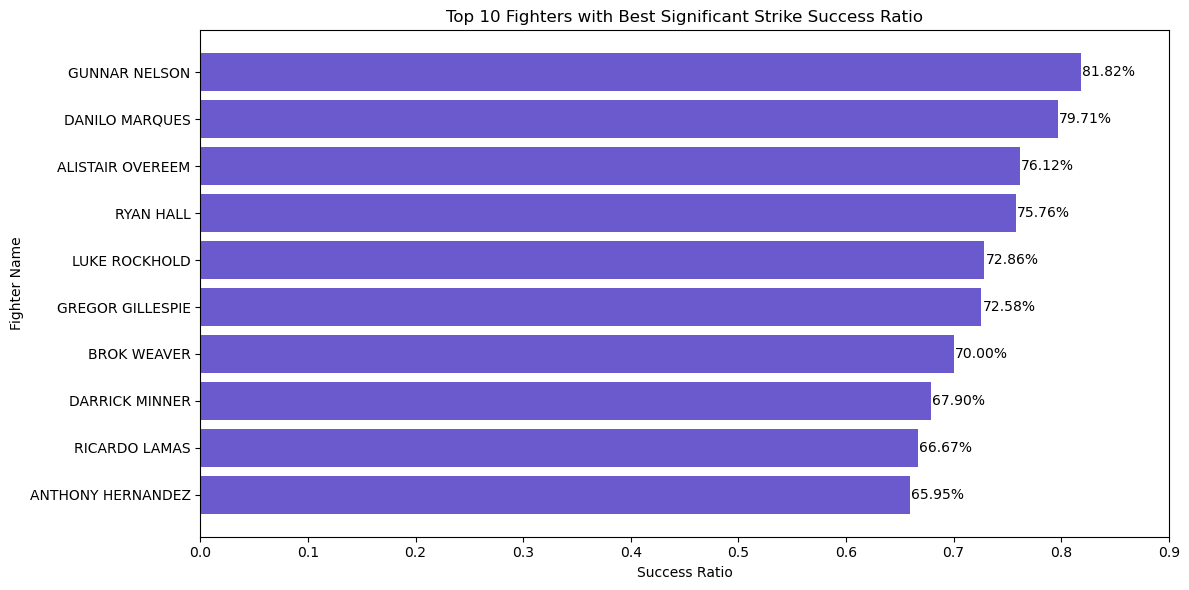

In [24]:
merged_fighters = merged_final_df.copy()
merged_fighters["success_rate"] = (
    merged_fighters["sig_str_succ"] / merged_fighters["sig_str_att"]
)
merged_fighters = merged_fighters[merged_fighters["sig_str_succ"] > 40]

top_10_overall = merged_fighters.nlargest(10, "success_rate")[["name", "success_rate"]]


plt.figure(figsize=(12, 6))
plt.barh(
    top_10_overall["name"],
    top_10_overall["success_rate"],
    align="center",
    color="slateblue",
)
plt.xlabel("Success Ratio")
plt.ylabel("Fighter Name")
plt.title("Top 10 Fighters with Best Significant Strike Success Ratio")
plt.gca().invert_yaxis()


for i, row in enumerate(top_10_overall.itertuples()):
    annotation = f"{row.success_rate * 100:.2f}%"
    plt.text(row.success_rate + 0.001, i, annotation, va="center")

plt.xlim(0, 0.9)
plt.tight_layout()
plt.show()


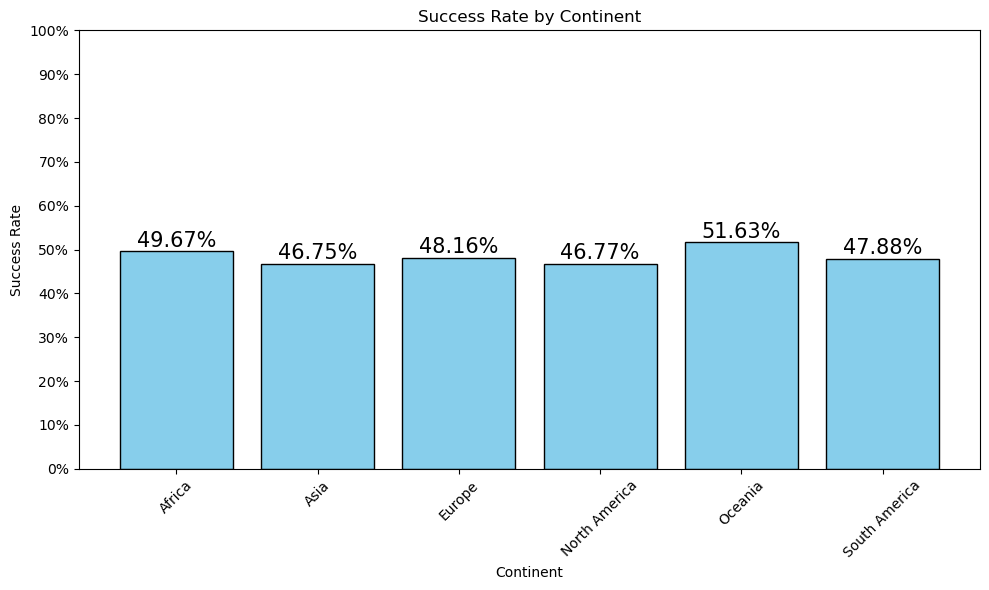

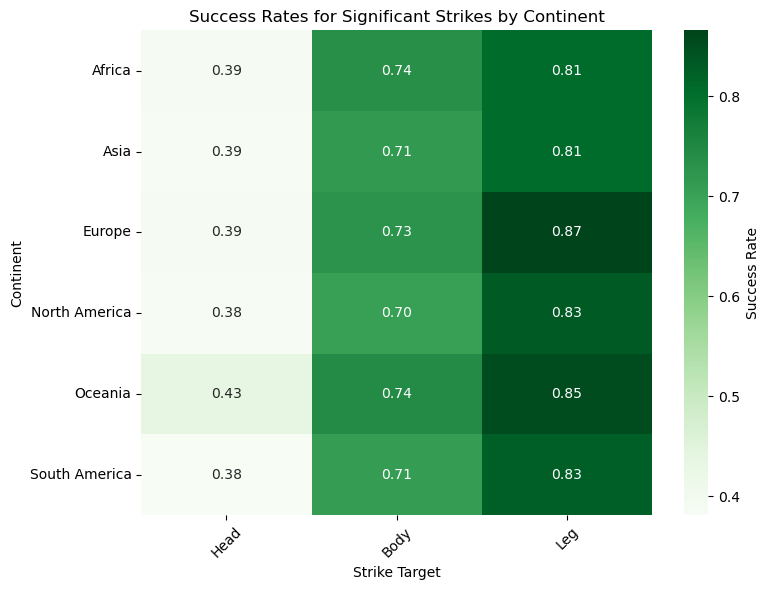

In [25]:
grouped_data = merged_final_df.groupby("continent").sum()


grouped_data["head_success_rate"] = (
    grouped_data["sig_str_head_succ"] / grouped_data["sig_str_head_att"]
)
grouped_data["body_success_rate"] = (
    grouped_data["sig_str_body_succ"] / grouped_data["sig_str_body_att"]
)
grouped_data["leg_success_rate"] = (
    grouped_data["sig_str_leg_succ"] / grouped_data["sig_str_leg_att"]
)

grouped_data["success_rate"] = (
    grouped_data["sig_str_succ"] / grouped_data["sig_str_att"]
)


plt.figure(figsize=(10, 6))
plt.bar(
    grouped_data.index, grouped_data["success_rate"], color="skyblue", edgecolor="black"
)


plt.xlabel("Continent")
plt.ylabel("Success Rate")
plt.title("Success Rate by Continent")


for idx, percentage in enumerate(grouped_data["success_rate"]):
    plt.text(
        idx,
        grouped_data["success_rate"].iloc[idx] + 0.01,
        f"{percentage * 100:.2f}%",
        ha="center",
        fontsize=15,
    )

plt.gca().set_yticks([i / 10 for i in range(0, 11)])
plt.gca().set_yticklabels([f"{int(i * 100)}%" for i in plt.gca().get_yticks()])

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

success_rate_data = grouped_data[
    ["head_success_rate", "body_success_rate", "leg_success_rate"]
]
plt.figure(figsize=(8, 6))
sns.heatmap(
    success_rate_data,
    annot=True,
    fmt=".2f",
    cmap="Greens",
    cbar_kws={"label": "Success Rate"},
)
plt.title("Success Rates for Significant Strikes by Continent")
plt.ylabel("Continent")
plt.xlabel("Strike Target")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Head", "Body", "Leg"], rotation=45)
plt.tight_layout()
plt.show()
